# TESS EB Validation

In [81]:
from importlib import reload
import pandas as pd

import tesseb_tce_meta as ttm
import tesseb_validate_catalog as tvc

In [99]:
reload(ttm)
reload(tvc)

df_cat = tvc.load_tesseb_validate_catalog()
len(df_cat)

4584

## Validation: NEB

- check the centroid offsets from matching TCE to see if a TESS EB entry is possibly NEB

Num. samples: 1000
Num. samples with matching TCE1: 644
Num. samples with TicOffset > 3σ: 114
Num. samples with TicOffset > 3σ and Tmag > 7 (NEB red flag): 106
Percent matched samples with NEB red flag: 16.5% (106 / 644)


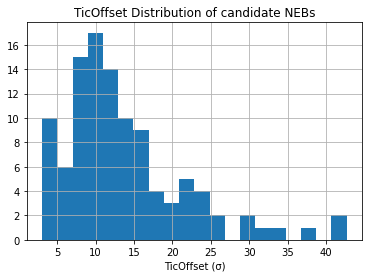

In [100]:
df = df_cat
df = df[~pd.isna(df["num_tces"])]  # exclude those TCEs have not been fetched yet.
num_samples = len(df)
print("Num. samples:", len(df))

df = df[(df["Match_TCE1_period_ratio"] == "Y") & (df["Match_TCE1_epoch_phase"] == "Y")]
num_matched_samples = len(df)
print("Num. samples with matching TCE1:", len(df))

df = df[df["TCE1_meanSkyOffsetSigTic"] > 3]
num_matched_samples_red_or_yellow_flag_tic_offset = len(df)
print("Num. samples with TicOffset > 3σ:", len(df))

df = df[df["Tmag"] > 7]
num_matched_samples_red_flag_tic_offset = len(df)
print("Num. samples with TicOffset > 3σ and Tmag > 7 (NEB red flag):", len(df))

print(
    "Percent matched samples with NEB red flag:", 
    f"{100 * num_matched_samples_red_flag_tic_offset / num_matched_samples:.1f}%",
    f"({num_matched_samples_red_flag_tic_offset} / {num_matched_samples})"
    )


ax = df["TCE1_meanSkyOffsetSigTic"].hist(bins=20, );
ax.set_xlabel("TicOffset (σ)");
ax.set_title("TicOffset Distribution of candidate NEBs");


In [101]:
print("TESS EB entries with TicOffset red flag")
print("    - TCE1_meanSkyOffsetSigTic: TCE TicOffset in σ")
with pd.option_context('display.max_colwidth', None):
    display(df[["tess_id", "Tmag",  "period", "bjd0",  "TCE1_meanSkyOffsetSigTic", "TCE1_tce_id_short", "TCE1_dvm_dataURI", "Diff_TCE1_period_ratio", "Diff_TCE1_epoch_phase"]])

TESS EB entries with TicOffset red flag
    - TCE1_meanSkyOffsetSigTic: TCE TicOffset in σ


,tess_id,Tmag,period,bjd0,TCE1_meanSkyOffsetSigTic,TCE1_tce_id_short,TCE1_dvm_dataURI,Diff_TCE1_period_ratio,Diff_TCE1_epoch_phase
25,349911034,11.82860,0.538482,1544.251113,13.848981,s0001-s0013:TCE1,mast:TESS/product/tess2018206190142-s0001-s0013-0000000349911034-00226_dvm.pdf,0.999956,0.995781
27,150101472,9.87730,3.278524,1547.331721,12.866879,s0001-s0039:TCE1,mast:TESS/product/tess2018206190142-s0001-s0039-0000000150101472-00493_dvm.pdf,0.999998,0.999895
38,321312438,9.63730,1.184768,1570.679030,9.495983,s0001-s0013:TCE1,mast:TESS/product/tess2018206190142-s0001-s0013-0000000321312438-00226_dvm.pdf,0.499946,0.001542
47,294206967,13.01970,2.758057,1598.883659,20.443556,s0001-s0013:TCE1,mast:TESS/product/tess2018206190142-s0001-s0013-0000000294206967-00226_dvm.pdf,0.999963,0.998781
52,73177813,9.73880,8.816019,1574.965564,11.722130,s0010-s0010:TCE1,mast:TESS/product/tess2019149095427-s0010-s0010-0000000073177813-00212_dvm.pdf,2.000420,0.000300
...,...,...,...,...,...,...,...,...,...
936,28304399,10.89520,0.952691,1683.972818,13.445546,s0014-s0055:TCE1,mast:TESS/product/tess2019199201929-s0014-s0055-0000000028304399-00652_dvm.pdf,1.000006,0.996363
954,233546272,11.88560,1.659138,1684.170247,15.927660,s0014-s0055:TCE1,mast:TESS/product/tess2019199201929-s0014-s0055-0000000233546272-00652_dvm.pdf,1.000010,0.006661
959,103743317,12.23330,1.539669,1684.682746,11.189806,s0014-s0050:TCE1,mast:TESS/product/tess2019199201929-s0014-s0050-0000000103743317-00611_dvm.pdf,1.000027,0.006806
981,219096494,10.87720,8.074192,1932.607232,23.264616,s0014-s0055:TCE1,mast:TESS/product/tess2019199201929-s0014-s0055-0000000219096494-00652_dvm.pdf,0.500013,0.501584
